# 1. Handling Missing Data Questions:

## How do you identify and handle missing values in a Pandas DataFrame?

Handling missing values in a Pandas DataFrame is an essential part of data preprocessing. Here's how you can identify and handle missing values in a Pandas DataFrame:

#### Identifying Missing Values:

##### isnull() or isna(): 
These methods can be used to identify missing values in a DataFrame. They return a DataFrame of the same shape as the original, with True where a value is missing and False where it's not.
##### notnull() or notna(): 
These methods are complementary to isnull() and isna(), returning True where values are not missing and False where they are.

#### Handling Missing Values:

##### Removing Missing Values:
###### dropna(): 
This method is used to drop rows or columns with missing values. You can specify axis to drop rows (axis=0) or columns (axis=1).

##### Imputing Missing Values:
###### fillna(): 
This method is used to fill missing values with a specified value. You can fill missing values with a constant, or you can use more sophisticated methods like filling with the mean, median, or mode.
##### Interpolation:
###### interpolate(): 
This method provides various interpolation techniques to estimate missing values based on the surrounding values.
##### Forward/Backward Fill:
###### ffill() or pad(): 
These methods fill missing values using the last valid observation.
###### bfill() or backfill(): 
These methods fill missing values using the next valid observation.
##### Replace:
You can replace specific values with a given value using replace() method.

Here's an example of how you can identify and handle missing values in a Pandas DataFrame:

In [14]:
import pandas as pd
import numpy as np

# Example DataFrame with missing values
data = {'A': [1, 2, np.nan, 4],
        'B': [np.nan, 10, 20, 30],
        'C': [5, np.nan, np.nan, 8]}
df = pd.DataFrame(data)

# Identifying missing values
print(df.isnull())  # or df.isna()

# Handling missing values
# Remove rows with any missing values
cleaned_df = df.dropna()

# Fill missing values with a specified value (e.g., mean)
filled_df = df.fillna(df.mean())

# Forward fill missing values
ffilled_df = df.ffill()

# Backward fill missing values
bfilled_df = df.bfill()

print(cleaned_df)
print(filled_df)
print(ffilled_df)
print(bfilled_df)

       A      B      C
0  False   True  False
1  False  False   True
2   True  False   True
3  False  False  False
     A     B    C
3  4.0  30.0  8.0
          A     B    C
0  1.000000  20.0  5.0
1  2.000000  10.0  6.5
2  2.333333  20.0  6.5
3  4.000000  30.0  8.0
     A     B    C
0  1.0   NaN  5.0
1  2.0  10.0  5.0
2  2.0  20.0  5.0
3  4.0  30.0  8.0
     A     B    C
0  1.0  10.0  5.0
1  2.0  10.0  8.0
2  4.0  20.0  8.0
3  4.0  30.0  8.0


Remember to choose the appropriate method based on your specific dataset and analysis requirements.

In addition to the methods mentioned above, another approach to handling missing values in a Pandas DataFrame is to use advanced techniques such as:

##### Multiple Imputation:
This involves creating multiple sets of complete data, each with missing values imputed differently based on uncertainty, and then analyzing each set separately to obtain combined estimates and standard errors.

##### Machine Learning-based Imputation:
Using machine learning algorithms to predict missing values based on other features in the dataset. Techniques such as K-Nearest Neighbors (KNN) or regression models can be used for this purpose.

##### Time Series Interpolation:
When dealing with time series data, you can use time-based interpolation methods to fill missing values based on the temporal ordering of data points.

##### Domain-specific Imputation:
Depending on the nature of your data, you may have domain-specific knowledge that can guide the imputation process. For example, in sensor data, missing values might be imputed differently based on sensor characteristics.

Each of these techniques has its advantages and disadvantages, and the choice of method depends on factors such as the nature of the data, the amount of missing data, and the specific analysis goals. Experimenting with different approaches and evaluating their impact on your analysis is often necessary to determine the most appropriate strategy for handling missing values in your dataset.

## What is imputation, and why might it be useful in dealing with missing data?

Imputation is the process of estimating or replacing missing or incomplete data with substituted values. It is a common technique used in data preprocessing to handle missing data effectively. Imputation can be useful for several reasons:

##### Preserving Data Integrity:
Imputation allows you to retain observations with missing values, preventing loss of valuable information that might occur if those observations were removed entirely.

##### Maintaining Sample Size:
By filling in missing values, imputation helps to maintain the sample size of your dataset, which can be crucial for statistical analysis and modeling tasks.

##### Reducing Bias: 
Removing observations with missing values may introduce bias into your analysis if those missing values are not missing completely at random (MCAR). Imputation methods can help reduce bias by providing estimated values for missing data based on the available information in the dataset.

##### Improving Model Performance: 
Many machine learning algorithms cannot handle missing values directly. Imputation allows you to prepare your data for modeling by providing complete datasets, which can improve the performance of machine learning models.

##### Preserving Relationships: 
Imputation methods aim to estimate missing values based on the relationships present in the data. This helps to preserve the underlying patterns and relationships between variables in the dataset.

##### Enabling Data Analysis: 
Complete datasets are often required for various types of data analysis, such as regression analysis, correlation analysis, and clustering. Imputation ensures that missing values are filled in, allowing you to perform these analyses effectively.

Overall, imputation is a valuable technique for dealing with missing data, as it enables you to maintain data integrity, preserve sample size, reduce bias, improve model performance, preserve relationships, and facilitate data analysis. However, it's essential to choose appropriate imputation methods based on the nature of your data and the specific requirements of your analysis.

# Data Transformation Questions:

## How can you encode categorical variables in a Pandas DataFrame?

You can encode categorical variables in a Pandas DataFrame using various techniques. Some common methods include:

##### Ordinal Encoding: 
Assigning integer values to categories based on their order or rank. This is suitable for ordinal categorical variables where there is a natural ordering among the categories.

##### One-Hot Encoding: 
Creating binary dummy variables for each category of the categorical variable. Each category becomes a separate binary feature, with 1 indicating the presence of the category and 0 indicating absence.

##### Label Encoding: 
Assigning a unique integer to each category in the categorical variable. This is suitable for nominal categorical variables where there is no inherent ordering among the categories.

Here's how you can perform these encoding techniques in a Pandas DataFrame:



In [24]:
import pandas as pd

# Example DataFrame with a categorical variable
data = {'category': ['A', 'B', 'C', 'A', 'B']}
df = pd.DataFrame(data)

# One-Hot Encoding
one_hot_encoded = pd.get_dummies(df['category'], prefix='category')

# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['category_label_encoded'] = label_encoder.fit_transform(df['category'])

# Ordinal Encoding (manually)
ordinal_mapping = {'A': 0, 'B': 1, 'C': 2}
df['category_ordinal_encoded'] = df['category'].map(ordinal_mapping)

print("One-Hot Encoded DataFrame:")
print(one_hot_encoded)

print("\nLabel Encoded DataFrame:")
print(df)


One-Hot Encoded DataFrame:
   category_A  category_B  category_C
0        True       False       False
1       False        True       False
2       False       False        True
3        True       False       False
4       False        True       False

Label Encoded DataFrame:
  category  category_label_encoded  category_ordinal_encoded
0        A                       0                         0
1        B                       1                         1
2        C                       2                         2
3        A                       0                         0
4        B                       1                         1


Ensure you choose the appropriate encoding method based on the nature of your categorical variable and the requirements of your analysis. Additionally, it's essential to handle encoding consistently across training and testing datasets to avoid data leakage and ensure model compatibility.

## What is one-hot encoding, and when would you use it in data preprocessing?

One-hot encoding is a technique used to convert categorical variables into a binary format, where each category is represented by a binary feature. In one-hot encoding, each category becomes a separate binary feature, and only one of these features is "hot" (set to 1) for each observation, indicating the presence of that category, while the others are "cold" (set to 0).

For example, consider a categorical variable "Color" with three categories: Red, Green, and Blue. After one-hot encoding, the DataFrame would have three binary columns: "Color_Red", "Color_Green", and "Color_Blue". If an observation's color is Red, then "Color_Red" would be set to 1, while "Color_Green" and "Color_Blue" would be set to 0.

One-hot encoding is typically used in data preprocessing when dealing with categorical variables in machine learning and statistical modeling tasks. Here are some scenarios where one-hot encoding is commonly employed:

##### Categorical Variables in Machine Learning Models: 
Many machine learning algorithms cannot directly handle categorical variables, as they expect numerical input. One-hot encoding converts categorical variables into a format that can be easily fed into machine learning algorithms.

##### Nominal Categorical Variables: 
One-hot encoding is suitable for nominal categorical variables where there is no intrinsic ordering among the categories. Each category is treated as a separate binary feature, ensuring that no ordinal relationship is implied.

##### Preventing Model Bias: 
One-hot encoding helps prevent model bias that might arise if ordinal encoding were used for nominal categorical variables. Assigning integer labels to categories might imply an order that does not exist, potentially leading to misleading results.

##### Handling Multiclass Classification Problems: 
In multiclass classification problems, where the target variable has more than two classes, one-hot encoding is commonly used to represent the categorical target variable, enabling the model to predict probabilities for each class independently.

##### Interpretability: 
One-hot encoding preserves the interpretability of categorical variables by explicitly representing each category as a separate binary feature. This allows for easier interpretation of the model's predictions and insights into the importance of different categories.

Overall, one-hot encoding is a valuable technique in data preprocessing for converting categorical variables into a suitable format for machine learning algorithms, ensuring compatibility, preventing bias, and preserving interpretability.

# 3. Removing Duplicates Questions:

## How do you identify and remove duplicate rows from a DataFrame?

You can identify and remove duplicate rows from a DataFrame in Pandas using the following methods:

#### Identifying Duplicate Rows:

##### duplicated(): 
This method returns a boolean Series indicating whether each row is a duplicate of a previous row. By default, it marks the first occurrence of each duplicate row as False and subsequent occurrences as True.
##### drop_duplicates(): 
This method returns a DataFrame with duplicate rows removed. By default, it keeps the first occurrence of each duplicate row and removes the rest.

#### Removing Duplicate Rows:

##### drop_duplicates(): 
This method is used to remove duplicate rows from a DataFrame. You can specify columns to consider when identifying duplicates using the subset parameter. Additionally, you can control which duplicate to keep using the keep parameter.

Here's how you can use these methods to identify and remove duplicate rows from a DataFrame:

In [25]:
import pandas as pd

# Example DataFrame with duplicate rows
data = {'A': [1, 2, 3, 1, 2, 3],
        'B': ['a', 'b', 'c', 'a', 'b', 'c']}
df = pd.DataFrame(data)

# Identifying duplicate rows
duplicate_rows = df.duplicated()
print("Duplicate Rows:")
print(duplicate_rows)

# Removing duplicate rows
cleaned_df = df.drop_duplicates()
print("\nDataFrame after removing duplicates:")
print(cleaned_df)


Duplicate Rows:
0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

DataFrame after removing duplicates:
   A  B
0  1  a
1  2  b
2  3  c


You can also specify the subset of columns to consider when identifying duplicates and control which duplicate to keep using the subset and keep parameters of the drop_duplicates() method:

In [26]:
# Remove duplicates based on a subset of columns
cleaned_df_subset = df.drop_duplicates(subset=['A'])
print("\nDataFrame after removing duplicates based on column 'A':")
print(cleaned_df_subset)

# Keep the last occurrence of each duplicate row
cleaned_df_keep_last = df.drop_duplicates(keep='last')
print("\nDataFrame after keeping the last occurrence of each duplicate row:")
print(cleaned_df_keep_last)



DataFrame after removing duplicates based on column 'A':
   A  B
0  1  a
1  2  b
2  3  c

DataFrame after keeping the last occurrence of each duplicate row:
   A  B
3  1  a
4  2  b
5  3  c


These methods allow you to efficiently identify and remove duplicate rows from a DataFrame based on your specific requirements.

## Can you explain the difference between the duplicated() and drop_duplicates() methods in Pandas?

Both "duplicated()" and "drop_duplicates()" are methods in Pandas used to work with duplicate rows in a DataFrame, but they serve different purposes:

##### duplicated():

The "duplicated()" method is used to identify duplicate rows in a DataFrame.

It returns a boolean Series indicating whether each row is a duplicate of a previous row.

By default, it marks the first occurrence of each duplicate row as "False" and subsequent occurrences as "True".

You can use the "keep" parameter to control which duplicates are considered (e.g., keep the first occurrence, last occurrence, or 
mark all duplicates).

##### drop_duplicates():

The "drop_duplicates()" method is used to remove duplicate rows from a DataFrame.

It returns a DataFrame with duplicate rows removed.

By default, it keeps the first occurrence of each duplicate row and removes the rest.

You can use the "subset" parameter to specify a subset of columns to consider when identifying duplicates.

You can use the "keep" parameter to control which duplicates are kept (e.g., keep the first occurrence, last occurrence, or keep 
none).

Here's a summary of the differences between the two methods:

"duplicated()" identifies duplicate rows and returns a boolean Series indicating their presence.

"drop_duplicates()" removes duplicate rows from the DataFrame and returns a DataFrame with duplicates removed.

Example usage:


In [27]:
import pandas as pd

# Example DataFrame with duplicate rows
data = {'A': [1, 2, 3, 1, 2, 3],
        'B': ['a', 'b', 'c', 'a', 'b', 'c']}
df = pd.DataFrame(data)

# Identify duplicate rows
duplicates = df.duplicated()
print("Duplicate rows identified using duplicated():")
print(duplicates)

# Remove duplicate rows
cleaned_df = df.drop_duplicates()
print("\nDataFrame after removing duplicates using drop_duplicates():")
print(cleaned_df)

Duplicate rows identified using duplicated():
0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

DataFrame after removing duplicates using drop_duplicates():
   A  B
0  1  a
1  2  b
2  3  c


In summary, "duplicated()" is used for identification, while "drop_duplicates()" is used for removal of duplicate rows in a DataFrame.

## Explain the difference between min-max scaling and z-score normalization.

**Min-max Scaling:**
+ Min-max scaling is a feature scaling technique used to rescale the features to a fixed range, typically between 0 and 1.
+ It works by subtracting the minimum value of each feature from the original value and then dividing by the difference between the maximum and minimum values.
+ Min-max scaling ensures that all feature values lie within the specified range, making it useful for algorithms that require input features to have a similar scale.
+ Formula: 
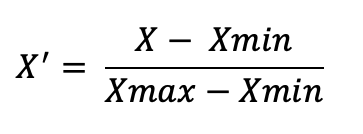

**Z-score Normalization:**
+ Z-score normalization, also known as standardization, is a feature scaling technique used to transform the features to have a mean of 0 and a standard deviation of 1.
+ It works by subtracting the mean of each feature from the original value and then dividing by the standard deviation.
+ Z-score normalization centers the data around the mean and scales it based on the variability (standard deviation) of the data.
+ It results in feature values that are centered around 0 and have a similar scale, making it suitable for algorithms that assume a Gaussian distribution of the features.
+ Formula:
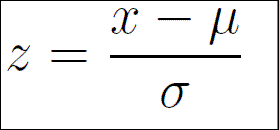

# Handling Outliers Questions:

## What are outliers, and why might they impact machine learning models?

Outliers are data points that significantly deviate from the rest of the dataset. These data points may be exceptionally high or low in value compared to the majority of the data. Outliers can occur due to various reasons, including measurement errors, data entry mistakes, natural variability in the data, or rare events.

Outliers can impact machine learning models in several ways:

##### Skewing Statistical Metrics: 
Outliers can significantly affect statistical metrics such as the mean, median, and standard deviation. The presence of outliers can skew these metrics, leading to inaccurate estimates of central tendency and dispersion.

##### Influence on Model Parameters: 
Some machine learning algorithms are sensitive to outliers and may adjust their parameters based on the presence of these extreme values. Outliers can influence the coefficients or weights learned by the model, leading to biased predictions.

##### Reduced Model Performance: 
Outliers can lead to overfitting or underfitting of machine learning models. Overfitting occurs when the model learns to capture the noise in the data, including outliers, leading to poor generalization to unseen data. Underfitting occurs when the model fails to capture the underlying patterns in the data due to the presence of outliers.

##### Violation of Assumptions: 
Certain machine learning algorithms assume that the data follows specific distributions or relationships. Outliers can violate these assumptions, leading to invalid model outputs and unreliable predictions.

##### Distortion of Decision Boundaries: 
In classification tasks, outliers may lie near decision boundaries, leading to misclassification of these data points. This can decrease the accuracy of the model and introduce errors in the classification results.

##### Decreased Robustness: 
Outliers can decrease the robustness of machine learning models, making them more susceptible to variations in the dataset. Models trained on datasets with outliers may perform poorly on new data that does not contain outliers.

To mitigate the impact of outliers on machine learning models, it is essential to perform data preprocessing steps such as outlier detection and treatment. This may involve techniques such as removing outliers, transforming the data to be more robust to outliers, or using robust statistical estimators. Additionally, selecting appropriate machine learning algorithms that are less sensitive to outliers can also help improve model performance.

## Describe different methods for detecting outliers in a dataset in Python

Outliers can impact machine learning models by skewing statistical measures and influencing the model's behavior, leading to inaccurate predictions or biased results. Detecting and handling outliers is crucial for ensuring the robustness and reliability of machine learning models. So, there are few methods to detect them:

Z-score can be used to detect outliers. We determine a threshold value for the Z-score, and data points with Z-scores beyond this threshold are considered potential outliers. It is common to use -3 and +3 as threshold. Any data point with a z-score below -3 or above +3 are treated as outliers. The reason for this common threshold is that 99.7% of the values in a standard normal distribution fall between -3 and +3.

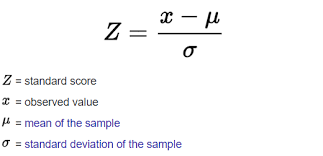

##### The suitability of Z-score as a method for detecting outliers depends on the specific characteristics of your data:

Z-score assumes that the data follow a normal distribution. If your data is not normally distributed, Z-score may not be the most appropriate method for detecting outliers. 

Z-score is sensitive to extreme values, which can influence the mean and standard deviation, leading to misleading outlier detection. 

Choosing a threshold for identifying outliers is subjective. A threshold of 3 is commonly used, but the optimal threshold may depend on your dataset and the context.

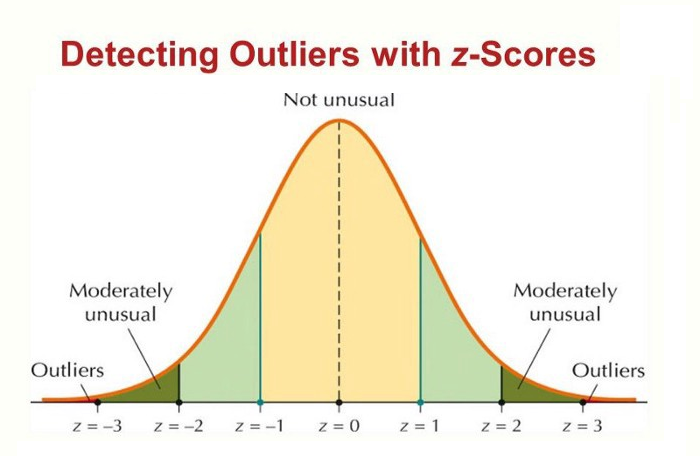

## How can you handle outliers in a continuous numerical variable in Python?


Handling outliers in a continuous numerical variable in Python typically involves one or more of the following approaches:


#### Removing Outliers:

If outliers are determined to be due to data entry errors or measurement mistakes and do not represent meaningful information, you may choose to remove them from the dataset.

This can be done by filtering out data points that fall outside a predefined range or threshold, such as those beyond a certain number of standard deviations from the mean or outside the interquartile range (IQR).

#### Transforming the Data:

Transforming the data can help reduce the impact of outliers while preserving the overall distribution.

Common transformations include logarithmic transformation, square root transformation, or Box-Cox transformation.

These transformations can make the distribution more symmetric and reduce the influence of extreme values.

#### Winsorization:

Winsorization involves capping or truncating extreme values to a specified percentile of the data distribution.

This approach replaces outliers with less extreme values, typically at the upper and lower tails of the distribution.

Winsorization can be implemented using libraries such as SciPy or by manually defining thresholds.

#### Binning:

Binning involves grouping data into bins or intervals and replacing outlier values with the bin boundaries.

This approach can help reduce the impact of outliers by aggregating data into broader categories.

Binning can be particularly useful when dealing with skewed distributions or when preserving the ordinal nature of the data is important.

#### Imputation:

In some cases, outliers can be replaced with more plausible values through imputation techniques.

Imputation methods may include replacing outliers with the mean, median, or mode of the variable, or using more sophisticated techniques such as predictive modeling.

#### Robust Statistical Methods:

Using robust statistical methods that are less sensitive to outliers can help mitigate their impact on analyses.

Examples include robust regression techniques (e.g., robust linear regression, robust regression trees) and non-parametric methods.

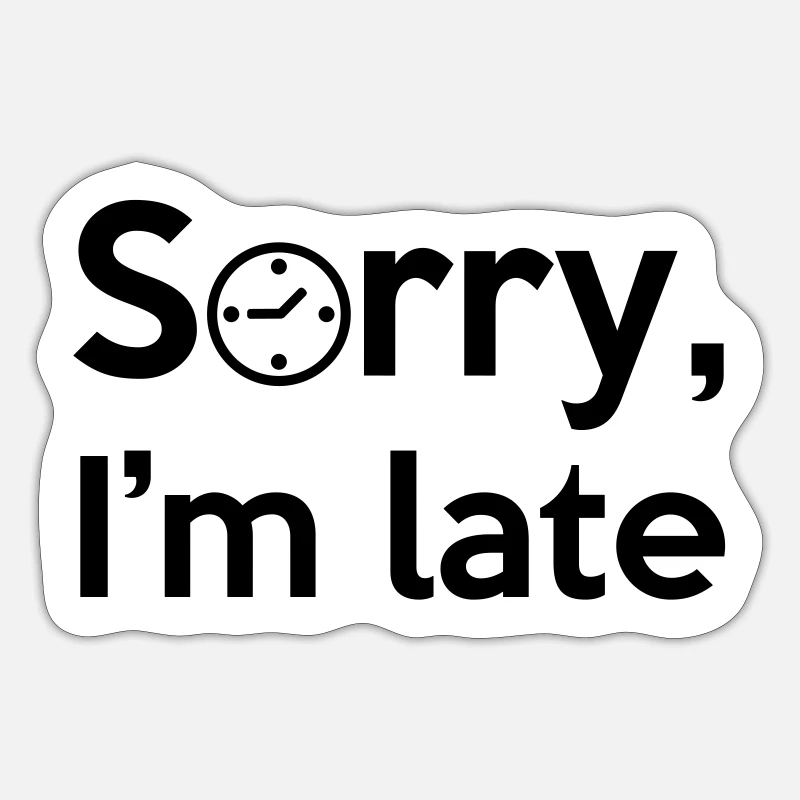